In [1]:
from exiting_particles_parser import exiting_particle_times_from_multiple_files
from plotters import plot_exiting_particles_vs_t_for_multiple_ws, plot_q_vs_d
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = [
    "./simulations/exitingParticles-w_15-D_3.txt",
    "./simulations/exitingParticles-w_15-D_4.txt",
    "./simulations/exitingParticles-w_15-D_5.txt",
    "./simulations/exitingParticles-w_15-D_6.txt"
]

Ds = [
  3,
  4,
  5,
  6
]

ws = [
  15,
  15,
  15,
  15
]

t_ests = [
    30,
    30,
    30,
    30
]

save_to = './b_n_v_t.png'
colors = sns.color_palette("bright", 4)

0.295 0.295
0.583 0.583
1.118 1.118
1.702 1.702


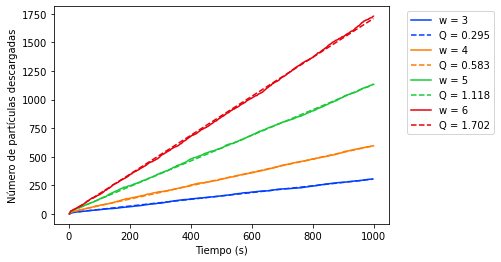

In [3]:
timestamps = exiting_particle_times_from_multiple_files(files)
caudales = plot_exiting_particles_vs_t_for_multiple_ws(timestamps, t_ests, Ds, colors, save_to, perform_regression=True)

0.295 0.009973849911383136
0.583 0.014376141719426931
1.118 0.047319276511246684
1.702 0.15981980349540015


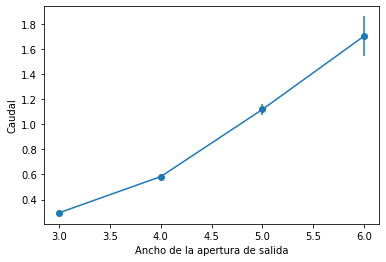

In [4]:
save_to_q_d = './Q_v_D.png'

Qs = []
Q_errs = []
for i in range(len(Ds)):
    Q, errs = caudales[Ds[i]]
    Qs.append(Q)
    if i == 0:
        Q_errs.append(errs / (1000-30))
    else:
        Q_errs.append(errs / (1000-30))
    print(Q, Q_errs[i])

plot_q_vs_d(Qs, Q_errs, Ds, ws[0], save_to_q_d, True)